# Glass Identification 

## Problem Statement

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. 

The dataset was credited to Vina Spiehler in 1987.

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


### Few Details of Data Set:
    
The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

Id number: 1 to 214, RI: refractive index, Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10), Mg: Magnesium, Al: Aluminum, Si: Silicon, K: Potassium, Ca: Calcium, Ba: Barium, Fe: Iron

Type of glass: (class attribute)
1- building_windows_float_processed, 2- building_windows_non_float_processed, 3- vehicle_windows_float_processed, 4- vehicle_windows_non_float_processed (none in this database), 5- containers, 6- tableware, 7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

### Requirement
Predict: Type of glass

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df_glass=pd.read_csv("Glass Identification.csv")
df_glass

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Observation from Data Set:
* A total of 214 samples were studied, each sample(oxide) having composition of chemicals Na: Sodium , Mg: Magnesium, Al: Aluminum, Si: Silicon, K: Potassium, Ca: Calcium, Ba: Barium, Fe: Iron

* The target variable(Type of Glass) contains 7 types of glasses with broader category of 2, i.e "window glass (classes 1-4)" and "non-window glass (classes 5-7)". 

* As we have to predict the category of glass as the output, we will build a Classification Model

# Starting the EDA

In [3]:
df_glass.shape

(214, 11)

In [4]:
df_glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [5]:
df_glass.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

Obs- We can see all the predictor as well as target columns are all continuous data, so no need of any encoding.

In [6]:
#Checking null values
df_glass.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

Obs- There is no missing data in the dataset

In [7]:
#Checking the number of unique values in all columns
df_glass.nunique()

Id               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

Obs- There are multiple entries of the same values in the columns, Id has all unique values

In [8]:
#getting the description of dataset
df_glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Obs- We can see
* The mean in columns "Na, AI, Ca, Ba, Fe" is more than median and hence we can say data in these columns is right skewed.
* The mean in columns "Mg, Si, K" is less than median and hence we can say data in these columns is left skewed
* The max of columns "RI, Na, AI,Si,K,Ca,Ba,Fe " is exceptionally high thaN 75%, thus we can say outliers must be present in these columns.

### Data Cleaning and Pre-Processing

#### Deleting the unwanted columns

In [9]:
# deleting id column as it is not useful for the analysis
df_glass.drop('Id', axis=1, inplace=True)
df_glass.shape

(214, 10)

### Data Visualization

#### Univariate Analysis

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


<AxesSubplot:xlabel='Type of glass', ylabel='count'>

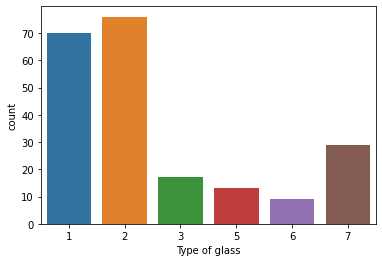

In [10]:
print(df_glass["Type of glass"].value_counts())
sns.countplot(x="Type of glass", data=df_glass)

Obs- We can see the maximum samples examined were of type 2 and 1, and least of type 6 and also we can analyse, the output data is highly imbalanced and thus would be balancing it later.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

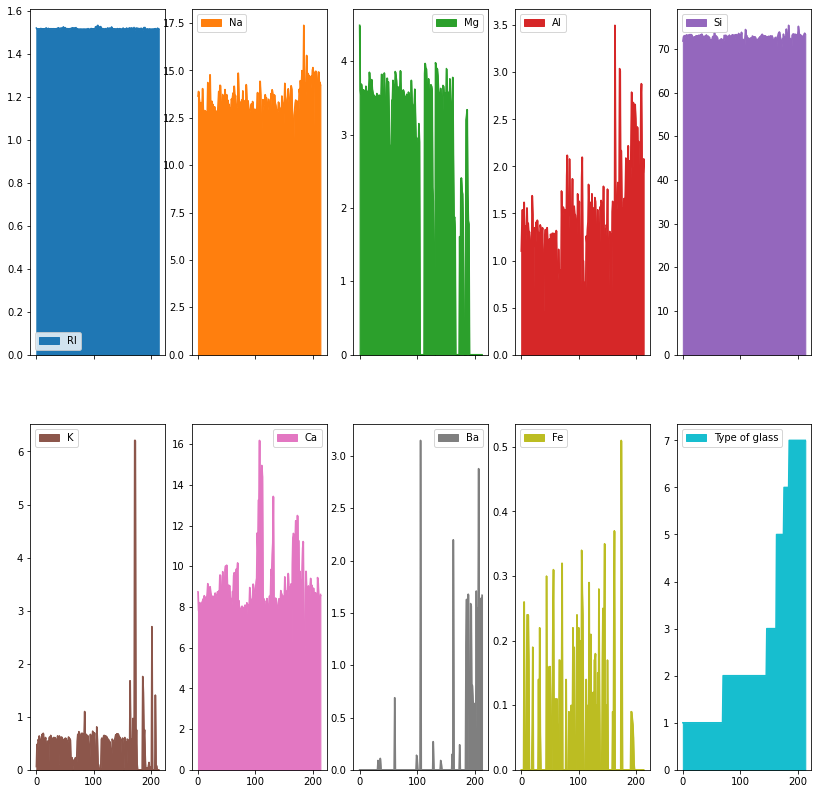

In [11]:
# Area plot to see the weightage of each component
df_glass.plot(kind='area',subplots=True,layout=(2,5),figsize=(14,14))

Obs- As we know, Silica is the main component in glass formation, and we can clearly see from the graph, that Si(Silica) has around 70% in the total composition of glass, followed by Na(Sodium) and Iron(Fe) has the least composition

<AxesSubplot:xlabel='Fe', ylabel='Density'>

<Figure size 1440x1440 with 0 Axes>

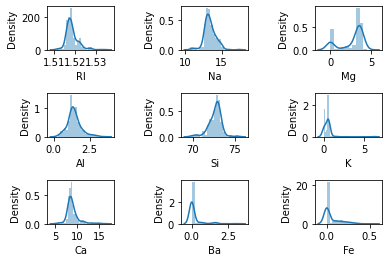

In [12]:
# Next, we will plot distribution plot of all columns in same figure(to check skewness)
plt.figure(figsize=(20,20))
fig, axes = plt.subplots(3,3)
fig.subplots_adjust(hspace=1, wspace=1)

sns.distplot(df_glass['RI'], ax=axes[0,0])
sns.distplot(df_glass['Na'], ax=axes[0,1])
sns.distplot(df_glass['Mg'], ax=axes[0,2])
sns.distplot(df_glass['Al'], ax=axes[1,0])
sns.distplot(df_glass['Si'], ax=axes[1,1])
sns.distplot(df_glass['K'], ax=axes[1,2])
sns.distplot(df_glass['Ca'], ax=axes[2,0])
sns.distplot(df_glass['Ba'], ax=axes[2,1])
sns.distplot(df_glass['Fe'], ax=axes[2,2])

Obs- We have already observed from description skewness is present, the same can be seen from the distribution plot there is 

Right Skewness in columns- Na, AI, Ca, Ba, Fe and Left Skewness in columns- Mg, Si, K 


RI                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Na               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Mg                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Al               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Si               AxesSubplot(0.766379,0.536818;0.133621x0.343182)
K                      AxesSubplot(0.125,0.125;0.133621x0.343182)
Ca                  AxesSubplot(0.285345,0.125;0.133621x0.343182)
Ba                   AxesSubplot(0.44569,0.125;0.133621x0.343182)
Fe                  AxesSubplot(0.606034,0.125;0.133621x0.343182)
Type of glass       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

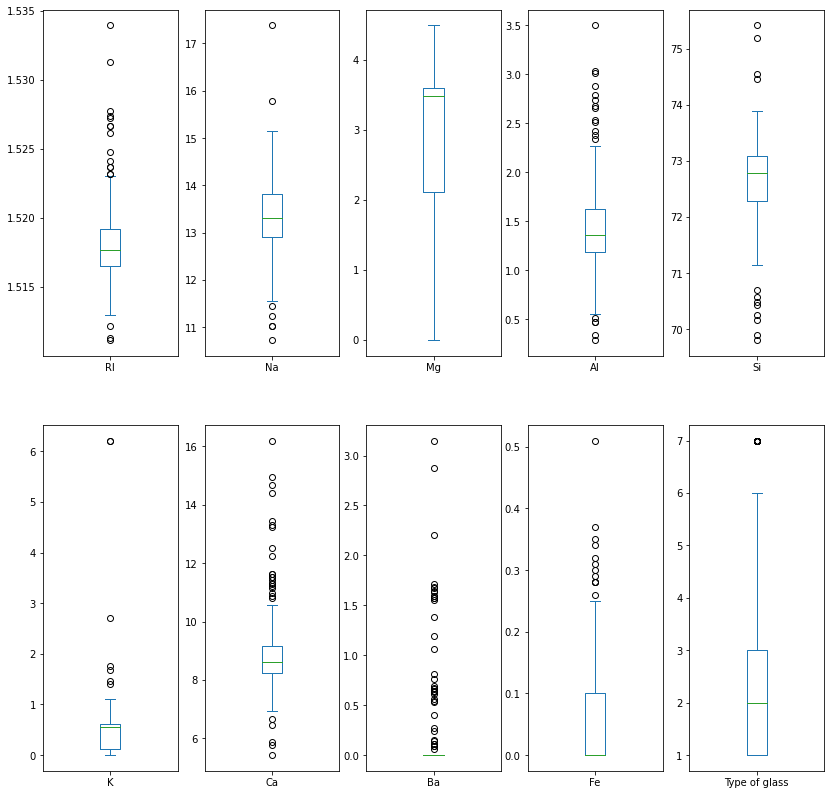

In [13]:
#Box plot for outliers
df_glass.plot(kind='box',subplots=True,layout=(2,5),figsize=(14,14))

Obs- Obs- We have already observed from description outliers are present, the same can be seen from the bar plot, that there are outliers in columns: RI, Na, Al, Si, K, Ca, Ba, Fe

#### Bivariate Analysis

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

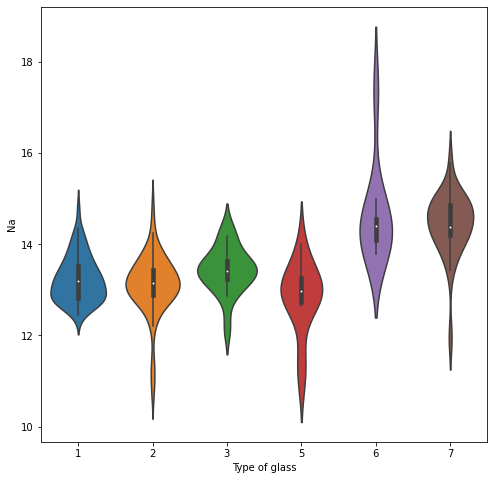

In [14]:
# Violin plot on % composition of Na in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Na'])

Obs- We can observe the percentage composition of " Na" in different types of glass.
* for "type 1"- The max composition of "Na" is around 15% and for most sample it is around 13% 
* for "type 2"- The max composition of "Na" is around 15.3% and for most sample it is around 13% 
* for "type 3"- The max composition of "Na" is around 14.8% and for most sample it is around 13.2%
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Na" is around 14.8% and for most sample it is around 13%
* for "type 6"- The max composition of "Na" is around 19% and for most sample it is around 14.2%
* for "type 7"- The max composition of "Na" is around 16.6% and for most sample it is around 15%

<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

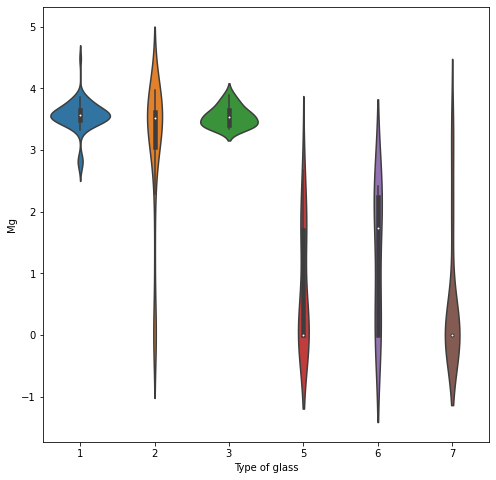

In [15]:
# Violin plot on % composition of Mg in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Mg'])

Obs- We can observe the percentage composition of " Na" in different types of glass.
* for "type 1"- The max composition of "Mg" is around 4.7% and for most sample it is around 3.5% 
* for "type 2"- The max composition of "Mg" is around 5% and for most sample it is around 3.5% 
* for "type 3"- The max composition of "Mg" is around 4.2% and for most sample it is around 3.5%
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Mg" is around 3.8% and for most sample it is around 0.1%
* for "type 6"- The max composition of "Mg" is around 3.7% and for most sample it is around 2.2 %
* for "type 7"- The max composition of "Mg" is around 4.5% and for most sample it is around -0.2%

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

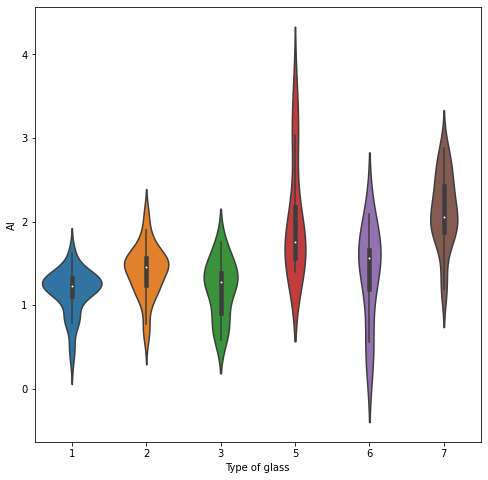

In [17]:
# Violin plot on % composition of Al in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Al'])

Obs- We can observe the percentage composition of " Al" in different types of glass.
* for "type 1"- The max composition of "Al" is around 1.9% and for most sample it is around 1.2% 
* for "type 2"- The max composition of "Al" is around 2.4% and for most sample it is around 1.5% 
* for "type 3"- The max composition of "Al" is around 2.2% and for most sample it is around 1.5%
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Al" is around 4.4% and for most sample it is around 1.8%
* for "type 6"- The max composition of "Al" is around 2.9% and for most sample it is around 1.5 %
* for "type 7"- The max composition of "Al" is around 3.3% and for most sample it is around 2.2%

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

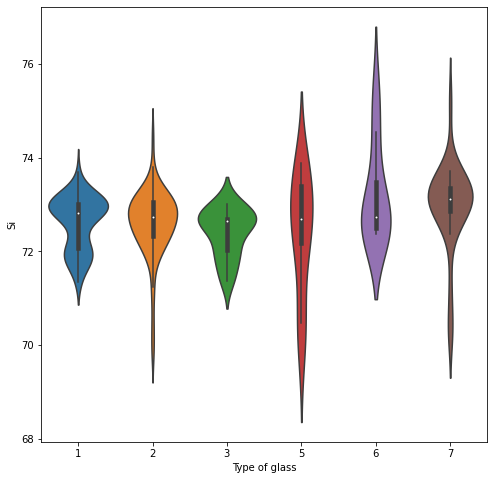

In [18]:
# Violin plot on % composition of Si in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Si'])

Obs-Obs- We can observe the percentage composition of "Si" in different types of glass.
* for "type 1"- The max composition of "Si" is around 74.2% and for most sample it is around 73% 
* for "type 2"- The max composition of "Si" is around 75% and for most sample it is around 72.8% 
* for "type 3"- The max composition of "Si" is around 73.6% and for most sample it is around 72.6%
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Si" is around 75.4% and for most sample it is around 73%
* for "type 6"- The max composition of "Si" is around 77% and for most sample it is around 72.8 %
* for "type 7"- The max composition of "Si" is around 75.6% and for most sample it is around 73.2%

<AxesSubplot:xlabel='Type of glass', ylabel='K'>

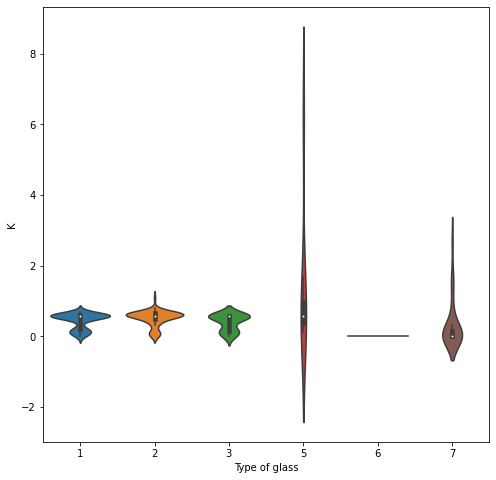

In [19]:
# Violin plot on % composition of K in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['K'])

Obs- We can observe the percentage composition of "K" in different types of glass.
* for "type 1"- The max composition of "K" is around 1% and for most sample it is around 0.8% 
* for "type 2"- The max composition of "K" is around 1.4% and for most sample it is around 0.8% 
* for "type 3"- The max composition of "K" is around 1% and for most sample it is around 0.7%
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "K" is around 9% and for most sample it is around 0.7%
* for "type 6"- There wasnt any sample of type 6 containing "K"
* for "type 7"- The max composition of "K" is around 3.5% and for most sample it is around 0.2%

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

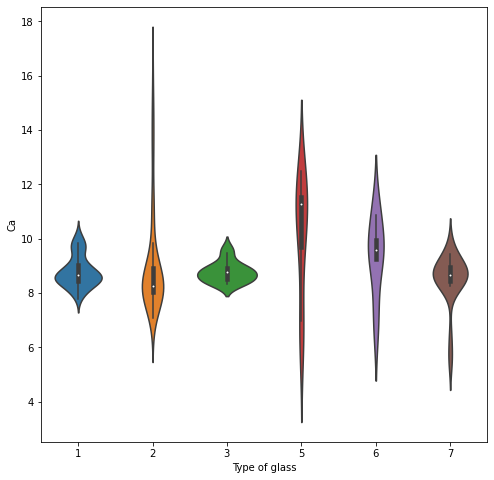

In [20]:
# Violin plot on % composition of Ca in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Ca'])

Obs- We can observe the percentage composition of "Ca" in different types of glass.
* for "type 1"- The max composition of "Ca" is around 11% and for most sample it is around 8.6% 
* for "type 2"- The max composition of "Ca" is around 17.9% and for most sample it is around 8% 
* for "type 3"- The max composition of "Ca" is around 9.9% and for most sample it is around 8.6%
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Ca" is around 15% and for most sample it is around 11.6%
* for "type 6"- The max composition of "Ca" is around 13% and for most sample it is around 10 %
* for "type 7"- The max composition of "Ca" is around 10.2% and for most sample it is around 9%

<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

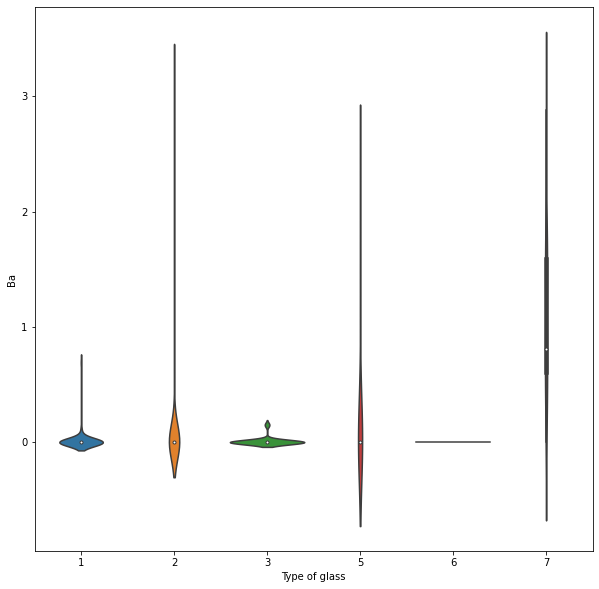

In [21]:
# Violin plot on % composition of Ba in various types of glass 
plt.figure(figsize=(10,10))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Ba'])

Obs- We can observe the percentage composition of "Ba" in different types of glass.
* for "type 1"- The max composition of "Ba" is around 0.8% and for most sample it is around 0% i.e its not present in most samples 
* for "type 2"- The max composition of "Ba" is around 3.1% and for most sample it is around 0% i.e its not present in most samples 
* for "type 3"- The max composition of "Ba" is around 0.3% and for most sample it is around 0% i.e its not present in most samples 
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Ba" is around 2.7% and for most sample it is around 0% i.e its not present in most samples
* for "type 6"- There wasnt any sample of type 6 containing "Ba"
* for "type 7"- The max composition of "Ba" is around 3.1% and for most sample it is around 0.8%

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

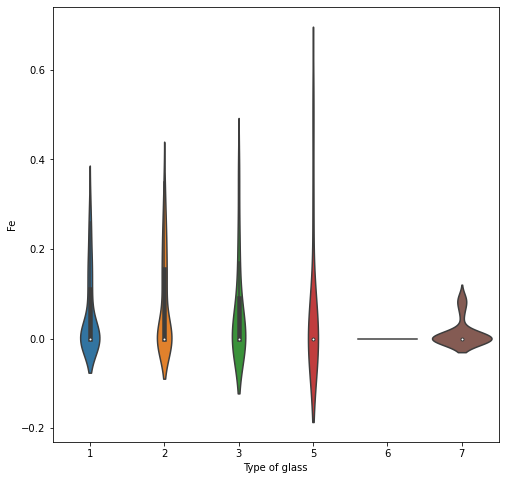

In [22]:
# Violin plot on % composition of Fe in various types of glass 
plt.figure(figsize=(8,8))
sns.violinplot(x=df_glass["Type of glass"],y=df_glass['Fe'])

Obs- We can observe the percentage composition of "Fe" in different types of glass.
* for "type 1"- The max composition of "Fe" is around 0.38% and for most sample it is around 0% i.e its not present in most samples 
* for "type 2"- The max composition of "Fe" is around 0.44% and for most sample it is around 0% i.e its not present in most sample
* for "type 3"- The max composition of "Fe" is around 0.5% and for most sample it is around 0% i.e its not present in most sample
* for "type 4"- Its already mentioned that there is none type 4 sample collected
* for "type 5"- The max composition of "Fe" is around 0.5% and for most sample it is around 0% i.e its not present in most sample
* for "type 6"-There wasnt any sample of type 6 containing "Fe"
* for "type 7"- The max composition of "Fe" is around 0.1% and for most sample it is 0% i.e its not present in most sample

#### Multivariate Analysis

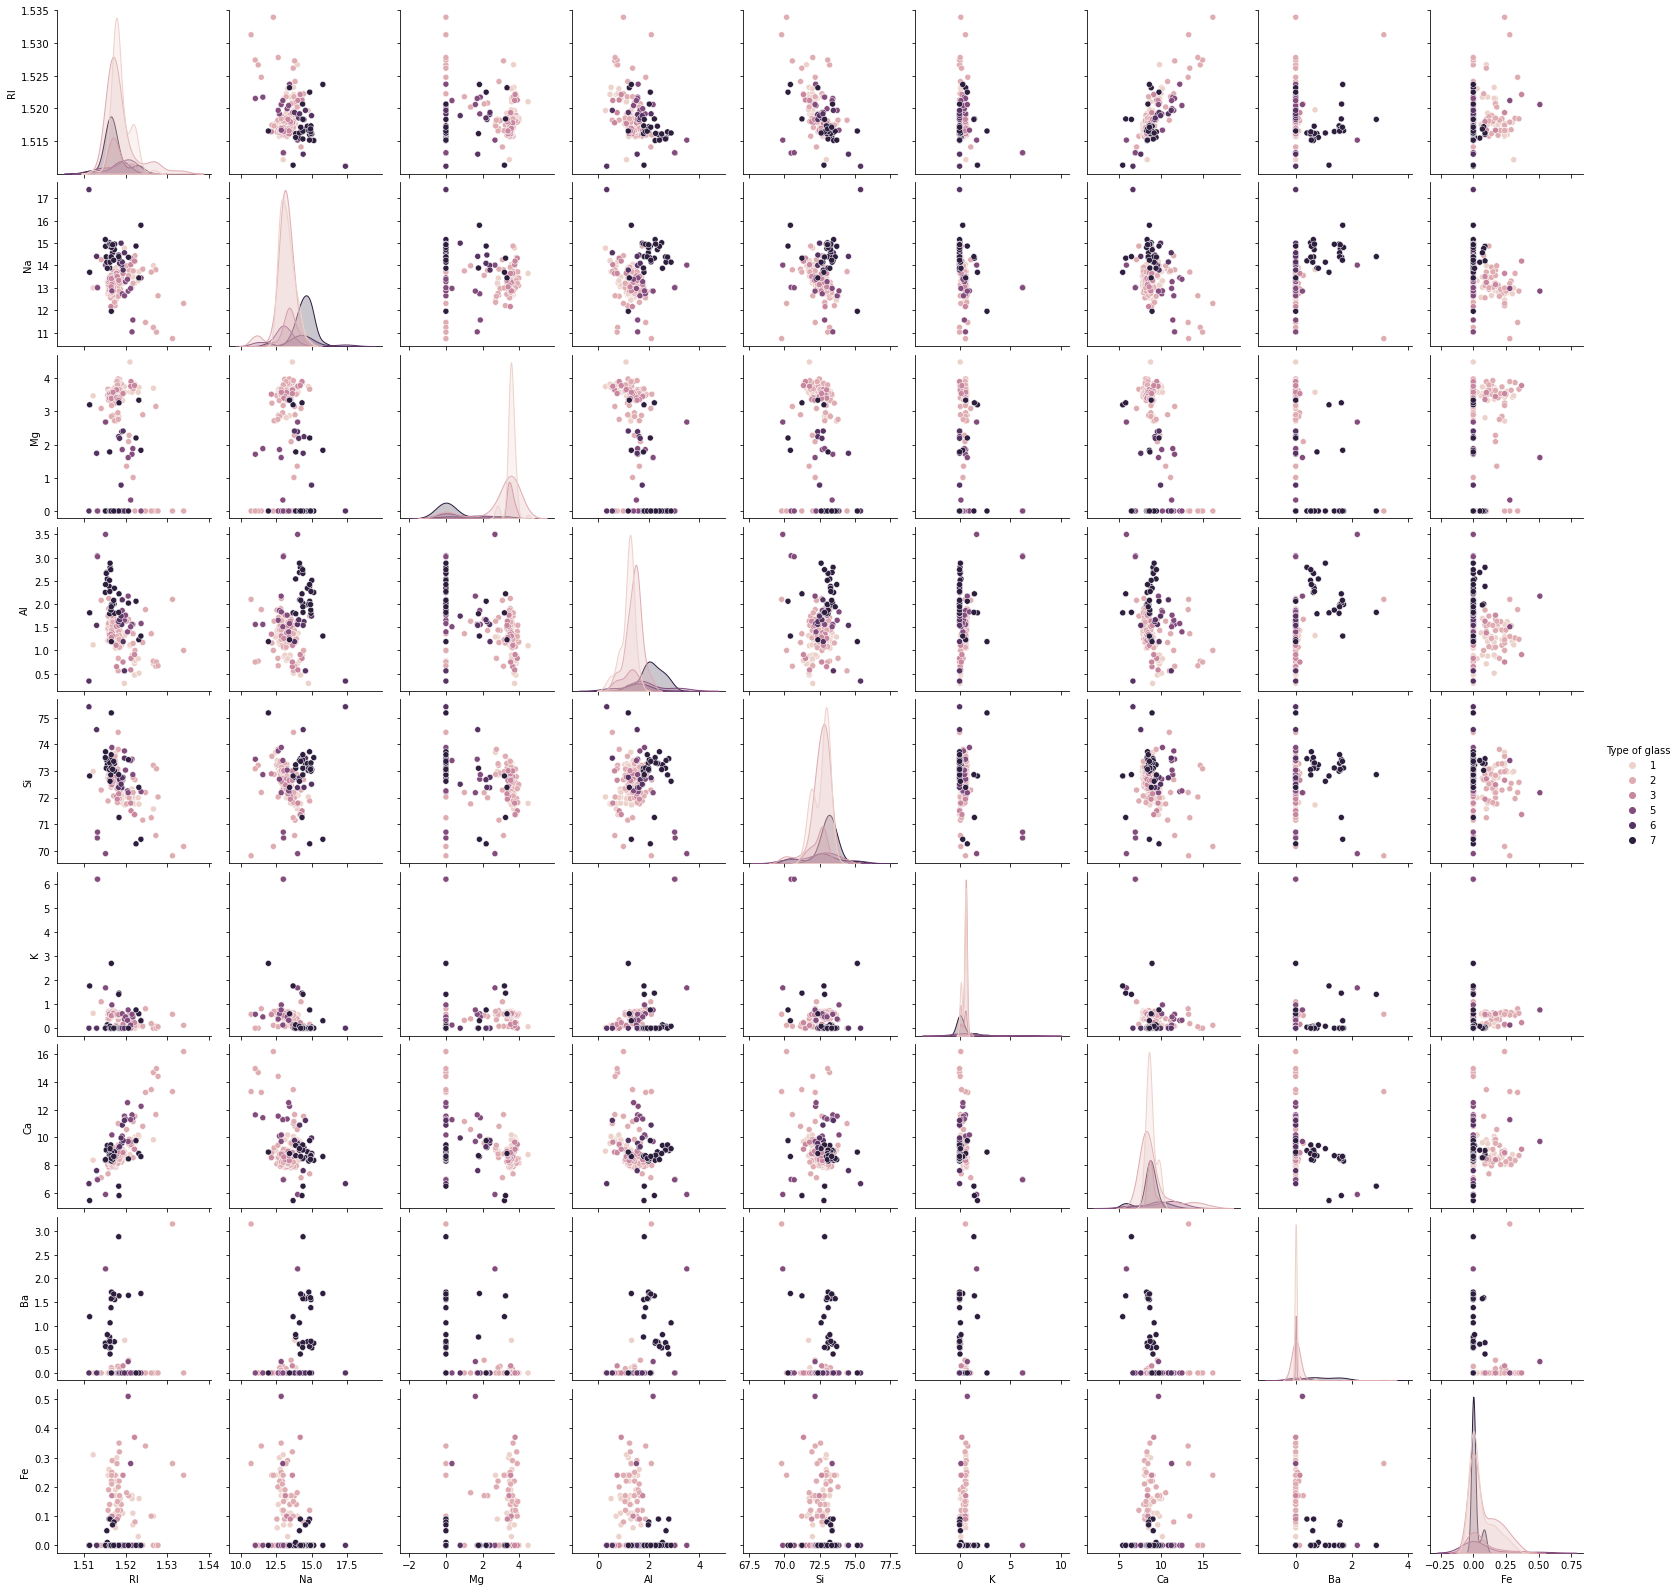

In [23]:
sns.pairplot(df_glass, hue="Type of glass")

### Checking Correlation

In [24]:
df_glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

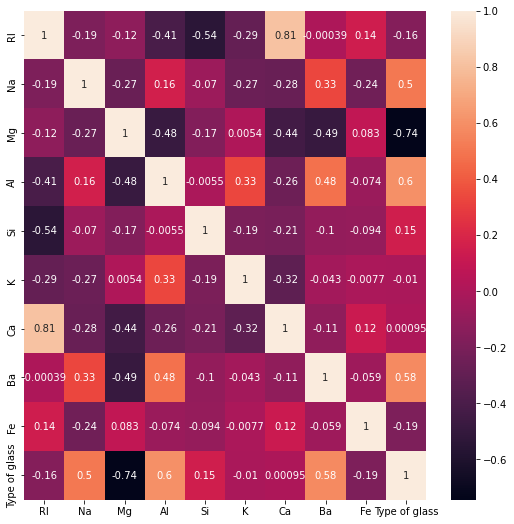

In [25]:
#displaying Correlation using heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df_glass.corr(),annot=True)

Obs- 
* Highly Positive Correlated Columns-("RI and Ca")
* Positive Correlated Columns("Na and Type of glass"),("Al and Ba")("Al and Type of glass"),("Ba and Type of glass")
* Highly Negative Corelated Columns-("Mg and Type of glass")
* Negative Correlated Column-("Mg and Al"),("Mg and Ca"),("Si and RI")("Ba and Mg")
We can see Mg is highly negatively correlated with output and other columns also but still it being an important component in glass composition , we will not drop it

### Data Transformation

#### Checking for skewness

In [26]:
df_glass.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

Obs- We can see except for Na, data in all other columns is skewed, applying transformation method to overcome skewness

#### Applying Transformation Method

In [28]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() #deafault method=boxcox

skew_col = ["RI","Mg","Al","Si","K","Ca","Ba","Fe"]
df_glass[skew_col]= pt.fit_transform(df_glass[skew_col].values)

In [27]:
df_glass.skew()

RI               0.000000
Na               0.454181
Mg              -0.889528
Al               0.000219
Si               0.130384
K               -0.071816
Ca              -0.209314
Ba               1.824175
Fe               0.858508
Type of glass    1.114915
dtype: float64

Obs- We can see large amount of skewness is gone after transformation

### Checking for outliers

In [29]:
# Method 1: Z-score
from scipy.stats import zscore
z=np.abs(zscore(df_glass))
threshold=3
print(np.where(z>3))

(array([  0,  21,  56,  84, 106, 106, 107, 107, 163, 163, 171, 171, 172,
       172, 180, 184, 184, 184, 185, 185, 186, 201], dtype=int64), array([2, 3, 0, 0, 1, 4, 0, 6, 3, 6, 0, 5, 0, 5, 0, 0, 1, 4, 0, 6, 6, 4],
      dtype=int64))


Obs-From the box plot, we already visualized outliers were present earlier in multiple columns.

Here it is exactly showing the locations where outliers are present, removing these locations data further

In [30]:
df_glass_new=df_glass[(z<3).all(axis=1)]

In [31]:
print("df_glass.shape:",df_glass.shape, "\ndf_glass_new.shape:",df_glass_new.shape)

df_glass.shape: (214, 10) 
df_glass_new.shape: (200, 10)


In [32]:
# Let's check the the data loss
data_loss = (214-200)/214*100
data_loss

6.5420560747663545

In [35]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_glass.quantile(0.25)
Q3=df_glass.quantile(0.75)
IQR=Q3 - Q1

df_glass_new2=df_glass[~((df_glass< (Q1 - 1.5 * IQR)) |(df_glass > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
print("df_glass.shape:",df_glass.shape, "\ndf_glass_new2:",df_glass_new2.shape)

df_glass.shape: (214, 10) 
df_glass_new2: (139, 10)


In [37]:
# Let's check the the data loss
data_loss2 = (214-139)/214*100
data_loss2

35.046728971962615

Obs- The Data Loss in IQR method is very high, so we will be going with Z-score method

In [39]:
df_glass=df_glass_new
df_glass.shape

(200, 10)

### Creating Input(Predictor) and Output(Target) Columns

#### As stated in the Problem Statement: The dataset should be divided into window glass (classes 1-4) and non-window glass (classes 5-7).

#### Merging the types accordingly    

In [41]:
glass_type = []
for i in df_glass['Type of glass']:
    if i >= 1 and i <= 4:
        glass_type.append('1')
    elif i >= 5 and i <= 7:
        glass_type.append('2')

df_glass['Type of glass'] = glass_type

In [43]:
df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,-0.123417,13.89,0.635322,-0.075745,0.038830,0.225146,-0.884440,-0.464625,-0.693317,1
2,-0.123417,13.53,0.516403,0.292641,0.395911,-0.037136,-0.938293,-0.464625,-0.693317,1
3,-0.123417,13.21,0.866193,-0.226816,-0.120490,0.464753,-0.488086,-0.464625,-0.693317,1
4,-0.123417,13.27,0.684728,-0.337631,0.523347,0.413380,-0.635734,-0.464625,-0.693317,1
5,-0.123417,12.79,0.659892,0.447910,0.367861,0.636594,-0.635734,-0.464625,1.521658,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.123417,14.14,-1.495259,2.409683,-0.120490,-1.166182,0.335672,2.164639,-0.693317,2
210,-0.123417,14.92,-1.495259,1.108621,0.494856,-1.542723,-0.318287,2.164741,-0.693317,2
211,-0.123417,14.36,-1.495259,1.158516,1.022908,-1.542723,-0.281600,2.164744,-0.693317,2
212,-0.123417,14.38,-1.495259,1.024328,1.314841,-1.542723,-0.245281,2.164740,-0.693317,2


Obs- We can see there are only two types of classes now

In [44]:
# Splitting the datset into input and output variables
x=df_glass.drop(columns=['Type of glass'],axis=1)
y=df_glass['Type of glass']

In [45]:
x.shape

(200, 9)

In [46]:
y.shape

(200,)

### Data Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale

array([[-0.26366402,  0.66760439,  0.63764797, ..., -1.20450013,
        -0.45253261, -0.70560028],
       [-0.26366402,  0.18290623,  0.51245129, ..., -1.27182414,
        -0.45253261, -0.70560028],
       [-0.26366402, -0.24793657,  0.88070748, ..., -0.70900153,
        -0.45253261, -0.70560028],
       ...,
       [-0.26366402,  1.30040476, -1.60541169, ..., -0.45086496,
         2.22398098, -0.70560028],
       [-0.26366402,  1.32733244, -1.60541169, ..., -0.40546169,
         2.22397714, -0.70560028],
       [-0.26366402,  1.12537487, -1.60541169, ..., -0.2500886 ,
         2.22398236, -0.70560028]])

In [48]:
x=pd.DataFrame(data=x_scale)

### Checking for Imbalance

In [49]:
print(y.value_counts())

1    157
2     43
Name: Type of glass, dtype: int64


Obs- We can see the output data i.e Types is highly imbalanced, and therefore balancing it below

#### Oversampling using SMOTE

pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [51]:
print(y.value_counts())

1    157
2    157
Name: Type of glass, dtype: int64


Obs- we can see the data in all columns is balanced

### Data Modelling

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    pred = dtc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  39


#### Splitting data into Train-Test

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=39)

In [54]:
x_train.shape

(235, 9)

In [55]:
y_train.shape

(235,)

In [56]:
x_test.shape

(79, 9)

In [57]:
y_test.shape

(79,)

### Using various Machine Learning Algorithms

In [62]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Logistic Regression

In [60]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.9746835443037974
Confusion Matrix:
 [[37  2]
 [ 0 40]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.98        40

    accuracy                           0.97        79
   macro avg       0.98      0.97      0.97        79
weighted avg       0.98      0.97      0.97        79



Obs- The Logistic Regression has provided the accuracy_score:0.9746835443037974 and f1-score:0.97

#### 2. Gaussian NB

In [64]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.9493670886075949
Confusion Matrix:
 [[35  4]
 [ 0 40]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.90      0.95        39
           2       0.91      1.00      0.95        40

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



Obs- The MultinomialNB has provided the accuracy_score:0.9493670886075949 and f1-score:0.95

#### 3.Decision Tree Classifier

In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.9873417721518988
Confusion Matrix:
 [[39  0]
 [ 1 39]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        39
           2       1.00      0.97      0.99        40

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



Obs- The Decision Tree Classifier has provided the accuracy-score:0.9873417721518988 and f1-score:0.99

#### 4.K Nearest Neighbor Classifier

In [66]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.9493670886075949
Confusion Matrix:
 [[38  1]
 [ 3 37]]
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.97      0.95        39
           2       0.97      0.93      0.95        40

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.9493670886075949 and f1-score:0.95

#### 5.Support Vector Machine Classifier

In [67]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.9873417721518988
Confusion Matrix:
 [[38  1]
 [ 0 40]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       0.98      1.00      0.99        40

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.9873417721518988 and f1-score:0.99

#### 6. Ensemble Methods

##### 6.1 Random Forest Classifier

In [82]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.9873417721518988
Confusion Matrix:
 [[39  0]
 [ 1 39]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        39
           2       1.00      0.97      0.99        40

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



Obs- The Random Forest Classifier has provided the accuracy-score:0.9873417721518988 and f1-score:0.99

##### 6.2 Ada Boost Classifier

In [69]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.9620253164556962
Confusion Matrix:
 [[37  2]
 [ 1 39]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96        39
           2       0.95      0.97      0.96        40

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



Obs- The Ada Boost Classifier has provided the accuracy-score:0.9620253164556962 and f1-score:0.96

##### 6.3 Gradient Boosting Classifier

In [70]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.9873417721518988
Confusion Matrix:
 [[39  0]
 [ 1 39]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        39
           2       1.00      0.97      0.99        40

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.9873417721518988 and f1-score:0.99

### Cross Validation (To avoid Underfitting/Overfitting)

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
# cv score for Logistic Regression 
print('CV score  for Logistic rgerssion',cross_val_score(lg,x,y,cv=5).mean()) 

CV score  for Logistic rgerssion 0.9428571428571427


In [73]:
# cv score for Multinomial NB 
print('CV score  for Gaussian NB ',cross_val_score(gnb,x,y,cv=5).mean())

CV score  for Gaussian NB  0.9301587301587301


In [74]:
# cv score for Decision Tree Classifier 
print('CV score  for Decision Tree Classifier ',cross_val_score(dtc,x,y,cv=5).mean()) 

CV score  for Decision Tree Classifier  0.9492063492063492


In [77]:
# cv score for K Neighbors Classifier 
print('CV score  for K Neighbors Classifier ',cross_val_score(knn,x,y,cv=5).mean()) 

CV score  for K Neighbors Classifier  0.961904761904762


In [78]:
# cv score for Support Vector Machine Classifier 
print('CV score  for Support Vector Machine Classifier ',cross_val_score(svc,x,y,cv=5).mean())

CV score  for Support Vector Machine Classifier  0.9555555555555555


In [79]:
# cv score for Random Forest Classifier
print('CV score  for Random Forest Classifier ',cross_val_score(rf,x,y,cv=5).mean())

CV score  for Random Forest Classifier  0.9492063492063492


In [80]:
# cv score for Ada Boost Classifier
print('CV score  for Ada Boost Classifier ',cross_val_score(ad,x,y,cv=5).mean())

CV score  for Ada Boost Classifier  0.9428571428571428


In [81]:
# cv score for GradientBoostingClassifier
print('CV score  for GradientBoostingClassifier ',cross_val_score(gb,x,y,cv=5).mean()) 

CV score  for GradientBoostingClassifier  0.9555555555555555


Obs-From the observation of accuracy and cross validation score and their difference we can predict that Ada Boost Classifier is the best model.

### Hyper Parameter Tuning

In [83]:
ad.get_params() # Getting List of parameters for Random forest Algorithm

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [84]:
#Applying default parameter values on Ada Boost Algorithm 
glass_best=AdaBoostClassifier()
glass_best.fit(x_train,y_train)
predadb=glass_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predadb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predadb))
print("Classification Report:\n",classification_report(y_test,predadb))

Accuracy: 0.9620253164556962
Confusion Matrix:
 [[37  2]
 [ 1 39]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96        39
           2       0.95      0.97      0.96        40

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



Obs- Our best model has given accuracy_score:0.9620253164556962 and f1-score:0.96

Have Not plotted AUC_ROC curve since the label of Y is 1 and 2 and it wasnt accepting it

### Saving the best model

In [90]:
import joblib

joblib.dump(glass_best,'Glass.obj')

['Glass.obj']

In [91]:
glass_model=joblib.load('Glass.obj')

In [92]:
glass_model

AdaBoostClassifier()

### Predicting the Output

In [93]:
ori = np.array(y_test)
predicted = np.array(glass_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,2,2
4,2,2
...,...,...
74,1,2
75,2,2
76,2,2
77,2,2
